In [1]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import math
from torchvision import datasets, transforms

In [3]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [4]:
path = './training' 
flist = os.listdir(path)

In [5]:
!ls -a ./training

.          cat_01.jpg cat_03.jpg cat_05.jpg dog_02.jpg dog_04.jpg
..         cat_02.jpg cat_04.jpg dog_01.jpg dog_03.jpg dog_05.jpg


In [6]:
flist

['cat_01.jpg',
 'cat_02.jpg',
 'dog_04.jpg',
 'dog_05.jpg',
 'cat_03.jpg',
 'dog_01.jpg',
 'cat_04.jpg',
 'dog_02.jpg',
 'dog_03.jpg',
 'cat_05.jpg']

In [7]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''


flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat_01.jpg',
 'cat_02.jpg',
 'dog_04.jpg',
 'dog_05.jpg',
 'cat_03.jpg',
 'dog_01.jpg',
 'cat_04.jpg',
 'dog_02.jpg',
 'dog_03.jpg',
 'cat_05.jpg']

In [8]:
img_list = glob.glob(path + '/*' + ".jpg")

In [9]:
img_list 

['./training/cat_01.jpg',
 './training/cat_02.jpg',
 './training/dog_04.jpg',
 './training/dog_05.jpg',
 './training/cat_03.jpg',
 './training/dog_01.jpg',
 './training/cat_04.jpg',
 './training/dog_02.jpg',
 './training/dog_03.jpg',
 './training/cat_05.jpg']

In [10]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [11]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [12]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.49411765, 0.40392157, 0.23137255],
        [0.39215686, 0.30196078, 0.13333333],
        [0.40784314, 0.31764706, 0.15294118],
        ...,
        [0.50588235, 0.41960784, 0.23137255],
        [0.55294118, 0.47058824, 0.25882353],
        [0.69803922, 0.61568627, 0.40392157]],

       [[0.50588235, 0.41568627, 0.24313725],
        [0.38039216, 0.29019608, 0.1254902 ],
        [0.42745098, 0.3372549 , 0.17254902],
        ...,
        [0.50588235, 0.41960784, 0.23137255],
        [0.54901961, 0.46666667, 0.25882353],
        [0.68235294, 0.6       , 0.38431373]],

       [[0.50588235, 0.41568627, 0.23921569],
        [0.37254902, 0.28235294, 0.11372549],
        [0.44705882, 0.35686275, 0.19607843],
        ...,
        [0.50980392, 0.42352941, 0.23137255],
        [0.54901961, 0.46666667, 0.25490196],
        [0.66666667, 0.58431373, 0.36862745]],

       ...,

       [[0.80784314, 0.83529412, 0.8745098 ],
        [0.81960784, 0.84705882, 0.88627451],
        [0.82745098, 0

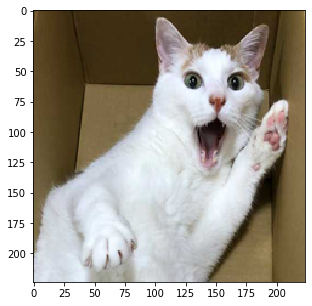

In [13]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[3])

plt.show()

In [14]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

<class 'PIL.Image.Image'>


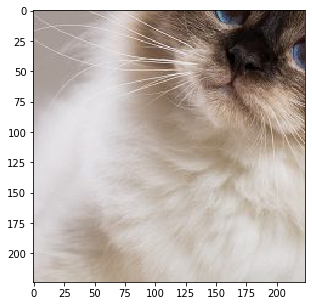

In [15]:
img = Image.open(img_list[0])

img_new = crop_center(img, 224, 224)

print(type(img_new))

plt.imshow(img_new)

plt.show()

# 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [16]:
path = './training' 
img_list = glob.glob(path + '/*' + ".jpg")
img_list

['./training/cat_01.jpg',
 './training/cat_02.jpg',
 './training/dog_04.jpg',
 './training/dog_05.jpg',
 './training/cat_03.jpg',
 './training/dog_01.jpg',
 './training/cat_04.jpg',
 './training/dog_02.jpg',
 './training/dog_03.jpg',
 './training/cat_05.jpg']

In [17]:
# 画像データ作成
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
img_array = np.concatenate([dog_img_array, cat_img_array], axis=0)
img_array.shape

(10, 224, 224, 3)

In [18]:
# ラベルデータ作成
dog_label = np.zeros(len(dog_img_array))
cat_label = np.ones(len(cat_img_array))

label = np.concatenate([dog_label, cat_label]).astype(int)
label

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

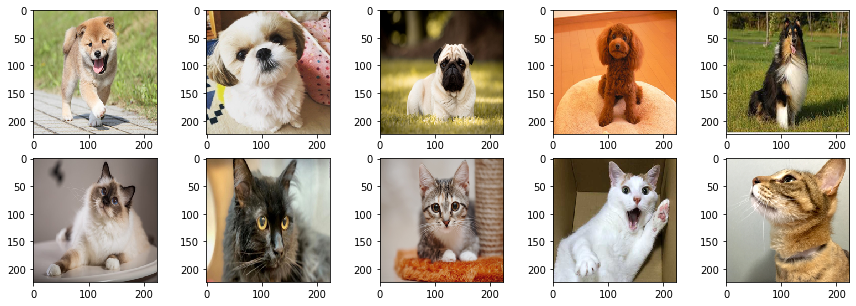

In [19]:
# 可視化
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(img_array[i])

In [20]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1) #C, fN, FS, S
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(54*54*32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)
        
    def forward(self, x):
#         print(x.shape)
        x = F.relu(self.conv1(x))
#         print(x.shape)
        x = F.max_pool2d(x, 2, 2)
#         print(x.shape)
        x = F.relu(self.conv2(x))
#         print(x.shape)
        x = F.max_pool2d(x, 2, 2)
#         print(x.shape)
        x = x.view(-1, 54*54*32)
#         print(x.shape)
        x = F.relu(self.fc1(x))
#         print(x.shape)
        x = F.relu(self.fc2(x))
#         print(x.shape)
        x = self.fc3(x)
#         print(x.shape)
        return x

In [21]:
X = torch.FloatTensor(img_array.transpose((0, 3, 1, 2)))
y = torch.LongTensor(np.array(label))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [23]:
torch.manual_seed(3)
model = CNNModel()
batchsize = 1
epochs = 20

train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

In [25]:
for epoch in range(epochs):
    
    model.train()
    for inputs, labels in train_loader:
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    model.eval()
    pred = model(X_test)
    prediction = pred.data.max(1)[1] #予測結果
    accuracy = prediction.eq(y_test).sum().numpy() / len(y_test) #正解率
    loss_ = criterion(pred, y_test)
    
    print('epoch: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(epoch+1, loss_.data.item(), accuracy))

epoch: 1	Loss: 0.683	Accuracy: 0.500
epoch: 2	Loss: 0.690	Accuracy: 0.500
epoch: 3	Loss: 0.624	Accuracy: 1.000
epoch: 4	Loss: 0.641	Accuracy: 0.500
epoch: 5	Loss: 0.564	Accuracy: 0.500
epoch: 6	Loss: 0.412	Accuracy: 1.000
epoch: 7	Loss: 0.261	Accuracy: 1.000
epoch: 8	Loss: 0.088	Accuracy: 1.000
epoch: 9	Loss: 0.312	Accuracy: 1.000
epoch: 10	Loss: 0.543	Accuracy: 0.500
epoch: 11	Loss: 0.205	Accuracy: 1.000
epoch: 12	Loss: 0.114	Accuracy: 1.000
epoch: 13	Loss: 0.088	Accuracy: 1.000
epoch: 14	Loss: 0.079	Accuracy: 1.000
epoch: 15	Loss: 0.067	Accuracy: 1.000
epoch: 16	Loss: 0.041	Accuracy: 1.000
epoch: 17	Loss: 0.019	Accuracy: 1.000
epoch: 18	Loss: 0.011	Accuracy: 1.000
epoch: 19	Loss: 0.008	Accuracy: 1.000
epoch: 20	Loss: 0.005	Accuracy: 1.000


# 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。


《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。


[albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries](https://github.com/albumentations-team/albumentations)


また、Kerasを使う場合はImageDataGeneratorも便利です。




《データ拡張の効果の調査》


データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。



In [26]:
from urllib.request import urlopen
import cv2

In [27]:
import albumentations as A
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

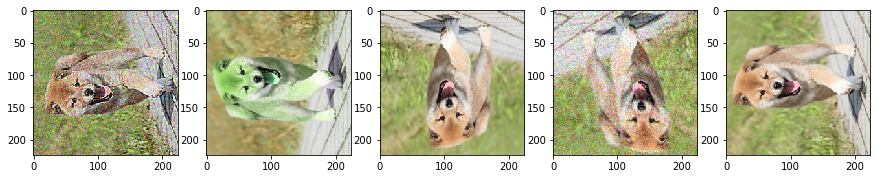

In [28]:
# 画像水増し関数
def get_augmentation():
    train_transform = [
        A.Flip(),
        A.Transpose(),
        A.ChannelShuffle(p=0.3),
        A.IAASharpen(p=0.3),
        A.GaussNoise(var_limit=(0.005, 0.03)),
        A.RandomRotate90(),
        A.ShiftScaleRotate(),
#         A.Cutout(max_h_size=15, max_w_size=15, fill_value=255),
    ]
    return A.Compose(train_transform)

plt.figure(figsize=(15,5))
for i in range(5):
    transforms = get_augmentation()

    img = img_array[0]
    augmented = transforms(image=img)

    img = augmented['image']
    plt.subplot(1,5,i+1)
    plt.imshow(img)

>極端に色や形状を変えた画像を水増しすると精度が悪くなる傾向があった。

In [29]:
# 犬画像を145枚生成
for i in range(29):
    for i in range(5):
        transforms = get_augmentation()
        img = dog_img_array[i]
        augmented = transforms(image=img)

        img = augmented['image'].reshape((1,224,224,3))
        dog_img_array = np.concatenate([dog_img_array, img], axis = 0)
        
dog_img_array.shape

(150, 224, 224, 3)

In [30]:
# 猫画像を145枚生成
for i in range(29):
    for i in range(5):
        transforms = get_augmentation()
        img = cat_img_array[i]
        augmented = transforms(image=img)

        img = augmented['image'].reshape((1,224,224,3))
        cat_img_array = np.concatenate([cat_img_array, img], axis = 0)
        
cat_img_array.shape

(150, 224, 224, 3)

In [31]:
# Newイメージ
img_array = np.concatenate([dog_img_array, cat_img_array], axis=0)

# Newラベル
dog_label = np.zeros(len(dog_img_array))
cat_label = np.ones(len(cat_img_array))
label = np.concatenate([dog_label, cat_label]).astype(int)

In [32]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1) #C, fN, FS, S
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(54*54*32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 54*54*32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [33]:
X = torch.FloatTensor(img_array.transpose((0, 3, 1, 2)))
y = torch.LongTensor(np.array(label))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [35]:
torch.manual_seed(3)
model = CNNModel()
batchsize = 5
epochs = 10

train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True)

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

In [37]:
for epoch in range(epochs):
    
    model.train()
    for inputs, labels in train_loader:
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    model.eval()
    pred = model(X_test)
    prediction = pred.data.max(1)[1] #予測結果
    accuracy = prediction.eq(y_test).sum().numpy() / len(y_test) #正解率
    loss_ = criterion(pred, y_test)
    
    print('epoch: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(epoch+1, loss_.data.item(), accuracy))

epoch: 1	Loss: 0.631	Accuracy: 0.750
epoch: 2	Loss: 0.679	Accuracy: 0.700
epoch: 3	Loss: 0.479	Accuracy: 0.783
epoch: 4	Loss: 0.430	Accuracy: 0.867
epoch: 5	Loss: 0.286	Accuracy: 0.867
epoch: 6	Loss: 0.307	Accuracy: 0.883
epoch: 7	Loss: 0.302	Accuracy: 0.933
epoch: 8	Loss: 0.290	Accuracy: 0.900
epoch: 9	Loss: 0.279	Accuracy: 0.933
epoch: 10	Loss: 0.292	Accuracy: 0.917


# テストデータ推定

In [38]:
test_path = './test' 
img_list = glob.glob(test_path + '/*' + ".jpg")
img_list

['./test/cat_1.jpg',
 './test/cat_2.jpg',
 './test/cat_3.jpg',
 './test/cat_6.jpg',
 './test/dog_6.jpg',
 './test/dog_1.jpg',
 './test/dog_3.jpg',
 './test/dog_2.jpg']

In [39]:
# 画像データ作成
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        dog_img = dog_img[:, :, :3]
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img[:, :, :3]

        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
img_array = np.concatenate([dog_img_array, cat_img_array], axis=0)
img_array.shape

(8, 224, 224, 3)

In [40]:
# ラベルデータ作成
dog_label = np.zeros(len(dog_img_array))
cat_label = np.ones(len(cat_img_array))

label = np.concatenate([dog_label, cat_label]).astype(int)
label

array([0, 0, 0, 0, 1, 1, 1, 1])

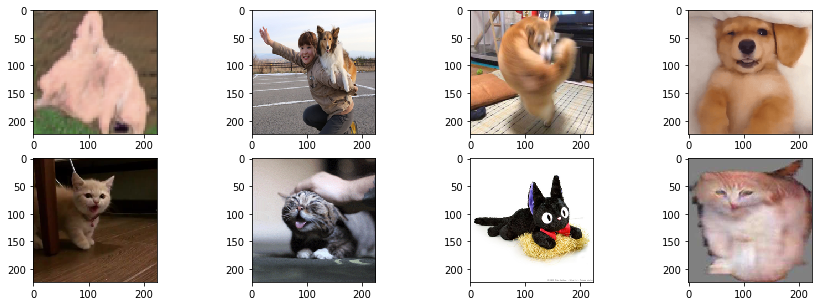

In [41]:
# 可視化
plt.figure(figsize=(15,5))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(img_array[i])

In [42]:
x_test = torch.FloatTensor(img_array.transpose((0, 3, 1, 2)))
y_test = torch.LongTensor(np.array(label))

In [43]:
with torch.no_grad():
    predicted_y = model.forward(x_test)
    loss = criterion(predicted_y, y_test)
    acc = predicted_y.argmax(axis=1)
    acc = acc.eq(y_test).sum().numpy() / len(y_test)
print(loss.item())
print(acc)
print(predicted_y.argmax(axis=1))

1.7421118021011353
0.75
tensor([0, 1, 0, 0, 0, 1, 1, 1])


# 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。


[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg)

In [44]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

In [45]:
image = Image.open('dog/dog_04.jpg')
image = np.array(image)
image.shape

(300, 400, 3)

In [46]:
import os
import xml.etree.ElementTree as ET

boxbox = []
point = 4
path = './anote/'

for filename in os.listdir(path):
    
    boundbox = []
    
    if not filename.endswith('.xml'):
        continue
        
    fullname = os.path.join(path, filename)
    tree = ET.parse(fullname)
    
    bndbox = tree.findall('object/bndbox')
    
    for i in range(point):
        boundbox.append(bndbox[0][i].text)
    
    boxbox.append(boundbox)
    
boxbox = [int(b) for b in boxbox[0]]
boxbox

[86, 12, 276, 284]

In [47]:
annotations = {'image': image, 'bboxes': [[86, 12, 276-86, 284-12]], 'category_id': [1]}
category_id_to_name = {0: 'cat', 1: 'dog'}

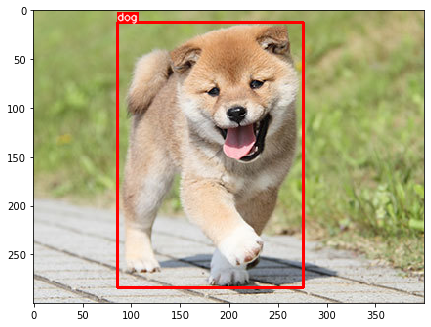

In [48]:
visualize(annotations, category_id_to_name)

# 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。

In [49]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=A.BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

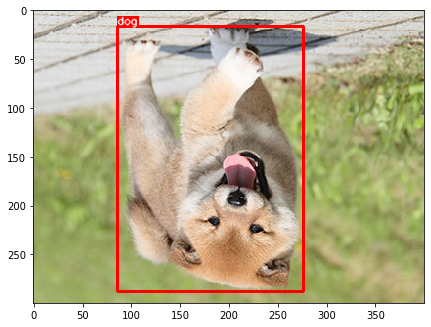

In [50]:
aug = get_aug([A.VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

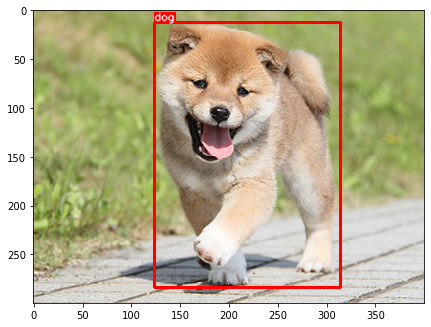

In [51]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)